In [1]:
#### 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd

row_total = pd.read_excel('data/1_crawling_raw.xlsx')
row_total['tags']

### 해시태그 통합 저장하기
tags_total = []

for tags in row_total['tags'] :
    
    # [2:-2] : 양쪽 끝의 대괄호 기호 제거
    # list형태로 넣어 str이 된 데이터를 , 기점으로구분함
    tags_list = tags[2:-2].split("', '")

    for tag in tags_list :
        tags_total.append(tag)


row_total['tags'][0]
row_total['tags'][0][2:-2].split("', '")

### 해시태그 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts
tag_counts.most_common(50)

### 데이터 정제

STOPWORD = ['#제주도','#제주', '', '#jeju', '#선팔맞팔', '#제주맘', \
            '#일상', '#먹스타맞팔', '#좋아요', '#키니샵', '#먹스타그램맞팔', '#jejuisland']

tags_total_selected = []
for tag in tags_total :
    if tag not in STOPWORD :
        tags_total_selected.append(tag)

tags_counts_selected = Counter(tags_total_selected)
tags_counts_selected.most_common(50)



[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433)]

In [2]:
### 워드클라우드 불러오기
# pip install wordcloud         # 오류 뜨면 Visual Studio Build Tool 설치하기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

# 폰트 설정
if platform.system() == 'Windows' :     #윈도우
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin' :    # 맥
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

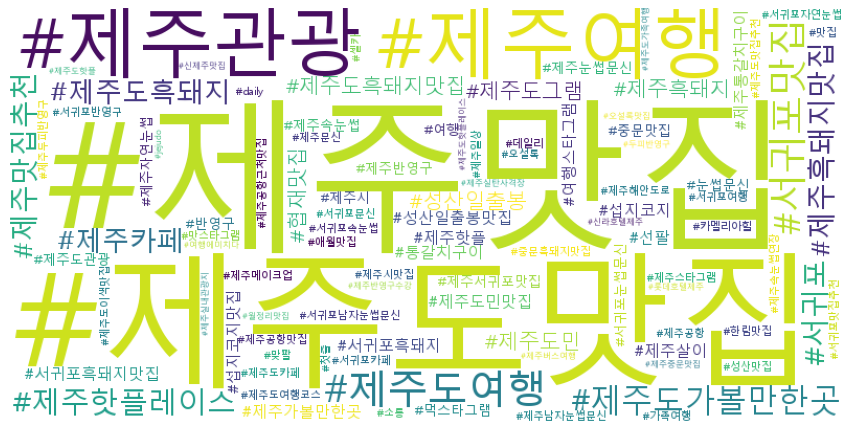

In [3]:
wordcloud = WordCloud(
                    font_path=font_path, background_color='white', max_words=100, \
                    relative_scaling=0.3, width = 800, height = 400
                    ).generate_from_frequencies(tags_counts_selected)

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('data/tag_wordcloud.png')